<a href="https://colab.research.google.com/github/swarajpatankar/Gold-Price-Prediction/blob/main/Gold__Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing The Libraries**

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

**Data Collection and Processing**

In [5]:
# loading the csv to a pandas DataFrame 

gold_price_dataset = pd.read_csv('/content/gld_price_data.csv')

In [6]:
# print first 5 rows in the dataframe

gold_price_dataset.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [8]:
# print last 5 rows in the dataframe

gold_price_dataset.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [9]:
# Number of Rows and Columns
gold_price_dataset.shape

(2290, 6)

In [12]:
# getting some basic information about the data
gold_price_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [14]:
# checking number of missing value
gold_price_dataset.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [15]:
# getting the statistical measures of the data
gold_price_dataset.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


**Correlation:**

1.Positive Correlation

2.Negative *Correlation

In [16]:
correlation = gold_price_dataset.corr() 

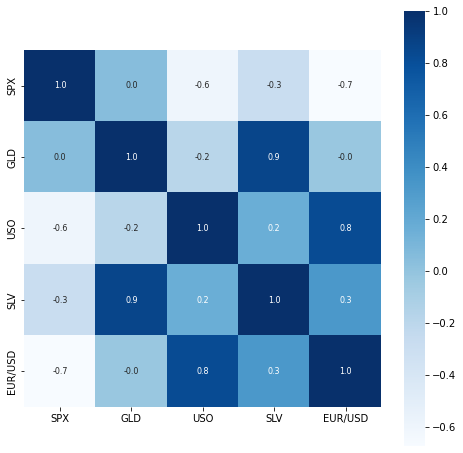

In [19]:
# constructing a heatmap to understand the correlation
plt.figure(figsize= (8,8))
sns.heatmap(correlation, cbar= True, square= True, fmt= '.1f', annot=True, annot_kws= {'size': 8}, cmap= 'Blues' )

In [20]:
# correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


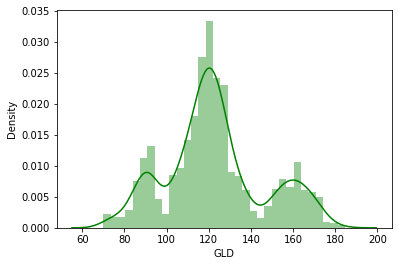

In [25]:
# checking the distribution of the GLD Price
sns.distplot(gold_price_dataset["GLD"], color='green')

Splitting the Features and Target

In [27]:
X = gold_price_dataset.drop(["Date","GLD"], axis= 1)
Y = gold_price_dataset["GLD"]

In [28]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


**Splitting into Training and Test Data**

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, random_state= 2)

**Model Training:**

Random Training Random Forest Regressor 

In [34]:
regressor = RandomForestRegressor(n_estimators=100)

In [35]:
# training the model
regressor.fit(X_train, Y_train)

RandomForestRegressor()

**Model Evaluation**

In [36]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [37]:
print(test_data_prediction)

[168.50399921  81.89329991 116.17390007 127.66090055 120.58900124
 154.76749813 150.63529823 125.92330065 117.46789905 125.98080066
 116.49310098 171.78200072 141.8659987  168.16229915 115.15100014
 117.93580033 140.02690296 170.13970116 159.20380271 159.97419957
 155.15780022 125.30649997 175.34109903 157.10020339 125.10460043
  93.85609985  77.28790024 120.54550011 119.11419933 167.49109985
  88.00360071 125.15750036  91.15820097 117.81490018 121.07229886
 136.32720084 115.79070121 115.52590054 146.45409974 107.47230073
 104.02110209  87.27699802 126.32690074 118.23989968 153.5693987
 119.70169992 108.37999998 108.28099817  93.22600024 127.02289837
  74.95050036 113.66009918 121.3844002  111.39059896 118.94039878
 121.02739918 159.25729992 168.1537007  147.0000967   85.72659855
  94.42570029  86.67739896  90.64480046 118.87680072 126.45260053
 127.54750014 169.51449918 122.28929913 117.35239892  98.6019004
 168.32770173 142.71639745 132.3162023  121.1828021  121.06679924
 119.5402005

In [41]:
# R square error 
error_score = metrics.r2_score(Y_test, test_data_prediction)
print('R squared error : ', error_score)

R squared error :  0.9891904647254398


**Compare the Actual Values and Predicted Values in a Plot**

In [42]:
Y_test = list(Y_test)

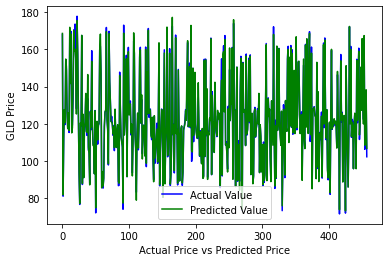

In [44]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.xlabel("Actual Price vs Predicted Price")
plt.ylabel('GLD Price')
plt.legend()
plt.show()